<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
import requests
import pandas as pd
from bs4 import BeautifulSoup

Download the webpage at the url


In [3]:
#your code goes here
data = requests.get(url).text

Create a soup object


In [4]:
#your code goes here
soup = BeautifulSoup(data,"html.parser")

Scrape the `Language name` and `annual average salary`.


In [5]:
#your code goes here
table = soup.find("table")
data1=[]

for row in table.find_all("tr"):
    cols = row.find_all("td")
    lang_name = cols[1].getText()
    ann_avg_salary = cols[3].getText()
    
    data1.append([lang_name,ann_avg_salary])
    
print(data1)    

[['Language', 'Average Annual Salary'], ['Python', '$114,383'], ['Java', '$101,013'], ['R', '$92,037'], ['Javascript', '$110,981'], ['Swift', '$130,801'], ['C++', '$113,865'], ['C#', '$88,726'], ['PHP', '$84,727'], ['SQL', '$84,793'], ['Go', '$94,082']]


Save the scrapped data into a file named *popular-languages.csv*


In [24]:
# your code goes here
df = pd.DataFrame(data1)

df.columns = df.iloc[0]      # Set first row as header
df = df[1:]   


df.to_csv("popular-languages.csv", header = True, index = False)


0     Language  Average Annual Salary
5        Swift               130801.0
1       Python               114383.0
6          C++               113865.0
4   Javascript               110981.0
2         Java               101013.0
10          Go                94082.0
3            R                92037.0
7           C#                88726.0
9          SQL                84793.0
8          PHP                84727.0


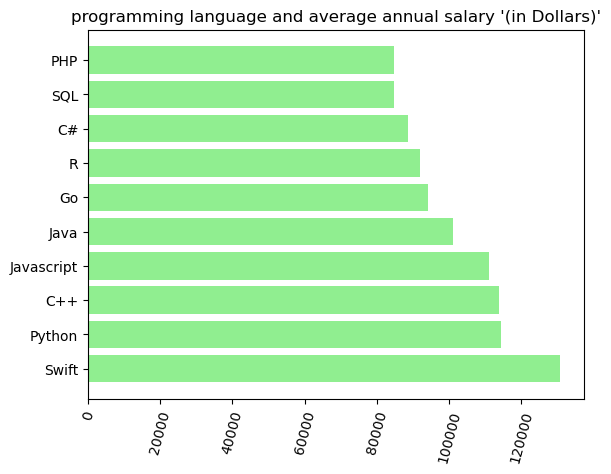

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

df["Average Annual Salary"] = df["Average Annual Salary"].replace('[\$,]', '', regex=True).astype(float)


df = df.sort_values(by = "Average Annual Salary", ascending = False)
print(df)

plt.barh(df["Language"],df["Average Annual Salary"], color="lightgreen")
plt.title("programming language and average annual salary '(in Dollars)'")
plt.xticks(rotation = 75)
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
